In [8]:
### IMPORT LIBRARIES ###
import os
import math
import magpy as mp
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

combined_path = "/proj/magness/CDS010-014-015_combined"
contrast_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff',
                    '#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#4169e1',
                    '#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']
##Setting figure output parameters
# sc.set_figure_params(dpi_save = 300, dpi = 200, format = 'svg')
fig_path = combined_path+'fig9_Tufts/'
sc.settings.figdir = fig_path

In [9]:
## Fig 4A-F defining Tuft cell gene lists Tuft cell DEG heatmap

## Tuft Cell Figure dictionaries

tuft_a = {
    'tuft_markers':
    ['SH2D6','LRMP','HPGDS','HLA-B','FYB1','BMX','AZGP1','AVIL','IFI6','PTGS1','ALOX5','ALOX5AP','ITPR2','TRPM5','HLA-E','KIT','KITLG','POU2F3','GNG13','DEFB1'],
    'SI_tuft':
    ['GABRA4','GABRP','RAB27B','KRT20','GNAT3','APOC2','TM4SF4','FAM3B','MT1G','CCL25','MELTF','MT2A','VIPR1','SERPINA1','SPINK1','MT1E'],
    'C_tuft':
    ['CA7','SNORC','AFAP1L2','LDHB','FXYD3','PAK3','C15orf48','GLRX','ANXA3','PHF20L1','KLK11','HTR3C','TMEM54','TIMP1','TMEM63A','OGDHL','PDCD4','COL27A1','ZG16B','MAP7','SPAG9','EHF','DEFA5','LITAF']
}

tuft_afc = {
    'tuft_markers':
    ['SH2D6','LRMP','HPGDS','HLA-B','FYB1','BMX','AZGP1','AVIL','IFI6','PTGS1','ALOX5','ALOX5AP','ITPR2','TRPM5','HLA-E','KIT','KITLG','POU2F3','GNG13','DEFB1'],
    'SI_tuft':
    ['GABRA4','GABRP','RAB27B','KRT20','GNAT3','APOC2','TM4SF4','FAM3B','MT1G','CCL25','MELTF','MT2A','VIPR1','SERPINA1','SPINK1','MT1E'],
    'C_tuft':
    ['CA7','SNORC','AFAP1L2','LDHB','FXYD3','PAK3','C15orf48','GLRX','ANXA3','PHF20L1','KLK11','HTR3C','TMEM54','TIMP1','TMEM63A','OGDHL','PDCD4','COL27A1','ZG16B','MAP7','SPAG9','EHF','DEFA5','LITAF']
}

tuft_b = {
    'Taste GPCRs':
    ['SUCNR1','TAS1R1','TAS1R3','GNAT3','GNB1','GNG13'],
    'Taste signal transduction':
    ['PDE4D','PLCB2','LRMP','ITPR2','TRPM5'],
    'Effectors':
    ['IL25','GJC3','CALHM1','CALHM2','CALHM3']
}

tuft_d = {
    'Ubiquitin-mediated proteasomal degradation':
    ['SKP1','CUL3','FBXO32','RBX1','CTSL','PSMD9','RNF14','RNF144B','HECTD1'],
    'MHC-1 antigen presentation':
    ['HLA-A','HLA-B','HLA-C','HLA-E','ITGB5','CD14'],
    'TLR':
    ['TLR4','TLR9','TLR5'],
    'IL-receptors':
    ['SIGIRR','IL13RA1','IL4R','IL17RB','IL17RA','IL25','IL27RA','IL6ST']
}

tuft_e = ['CHGA','LYZ','ITLN1','DEFB1','PRSS3','PLA2G2A','DEFA5','CAMP','DEFA6','LCN2']

tuft_f = {
    'ACh':
    ['CHAT','SLC18A3','NCAM1'],
    'Leukotriene':
    ['PLA2G4A','PLA2G12A','ALOX5','ALOX5AP','LTC4S','LTA4H'],
    'PGD2 biosynthesis':
    ['PLA2G4A','PTGS1','HPGDS'],
}


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



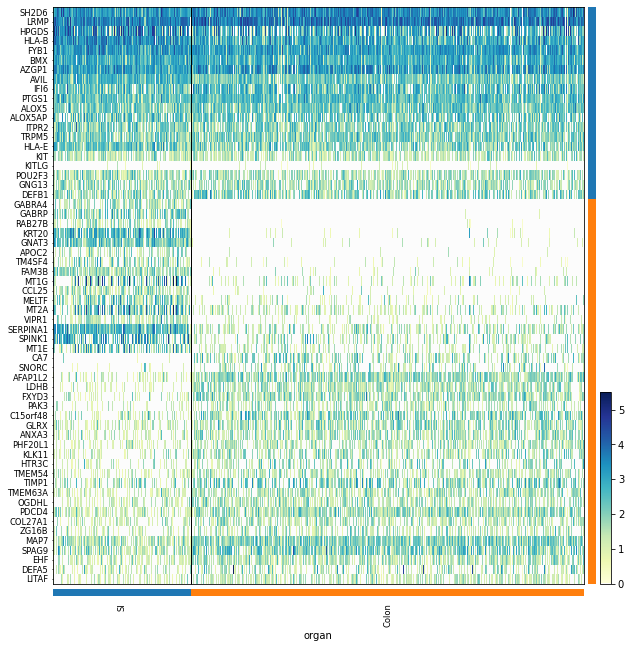

In [4]:
### Figure 4A - Tuft cell DEGs 
adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')
adata.obs.organ.cat.reorder_categories(['SI','Colon'],inplace=True)
subset = adata[adata.obs.type=='tuft']
sc.pl.heatmap(subset, tuft_afc, groupby = 'organ', swap_axes = True, show_gene_labels = True, cmap = mp.blues)#, save = '_RJB_tuft_panel_A_v2')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



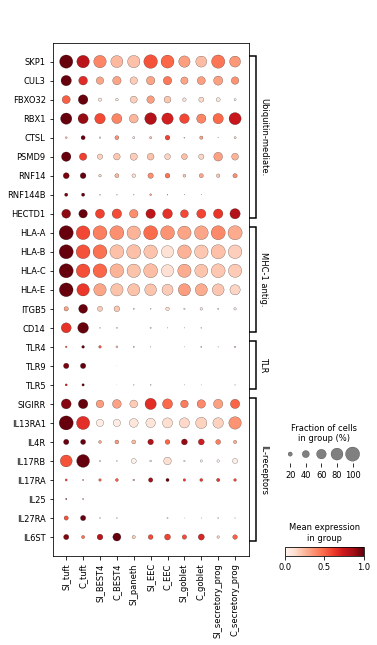

In [6]:
### Figure 4B - Tuft cell differential taste signal transduction
adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

adata = mp.scale_adata(adata, groupby = 'lineage')
subset = adata[adata.obs.type.isin(['tuft','paneth','goblet','BEST4','EEC','nan'])]
subset.obs.lineage.cat.reorder_categories(['SI_tuft','C_tuft','SI_BEST4','C_BEST4','SI_paneth','SI_EEC','C_EEC','SI_goblet','C_goblet','SI_secretory_prog','C_secretory_prog'], inplace=True)

sc.pl.dotplot(subset, tuft_d, groupby = 'lineage', cmap = 'Reds', swap_axes = True, layer = 'raw_scaled')#, save = 'RJB_tuft_panel_B')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



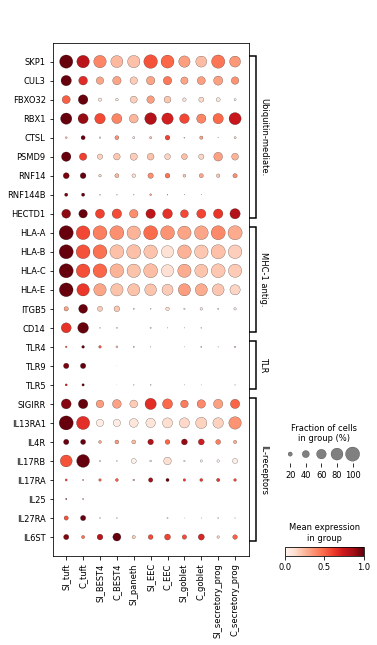

In [10]:
### Figure 4D - Tuft cell broad immune response
adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

adata = mp.scale_adata(adata, groupby = 'lineage')
subset = adata[adata.obs.type.isin(['tuft','paneth','goblet','BEST4','EEC','nan'])]
subset.obs.lineage.cat.reorder_categories(['SI_tuft','C_tuft','SI_BEST4','C_BEST4','SI_paneth','SI_EEC','C_EEC','SI_goblet','C_goblet','SI_secretory_prog','C_secretory_prog'], inplace=True)

sc.pl.dotplot(subset, tuft_d, groupby = 'lineage', cmap = 'Reds', swap_axes = True, layer = 'raw_scaled')#, save = 'RJB_tuft_panel_d')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



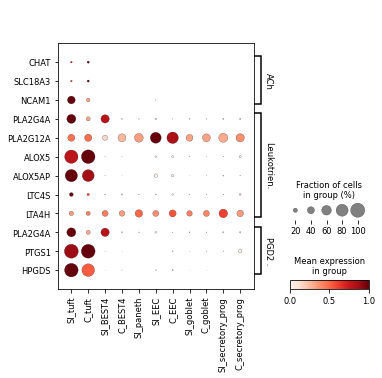

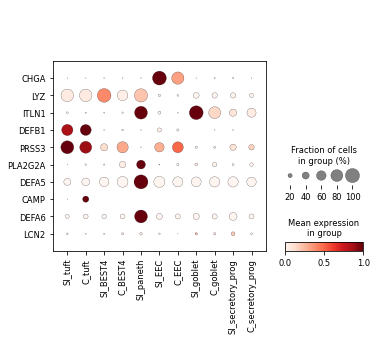

In [11]:
### Figure 4E - Tuft cell antimicrobial peptides
adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

adata = mp.scale_adata(adata, groupby = 'lineage')
subset = adata[adata.obs.organ=='Colon']
subset.obs.lineage.cat.reorder_categories(['C_ISC','C_TA','C_earlyACC','C_lateACC','C_tuft','C_secretory_prog','C_goblet','C_EEC','C_BEST4'], inplace=True)

### Figure 4F - Tuft cell biosynthesis from mouse
adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

adata = mp.scale_adata(adata, groupby = 'lineage')
subset = adata[adata.obs.type.isin(['tuft','paneth','goblet','BEST4','EEC','nan'])]
subset.obs.lineage.cat.reorder_categories(['SI_tuft','C_tuft','SI_BEST4','C_BEST4','SI_paneth','SI_EEC','C_EEC','SI_goblet','C_goblet','SI_secretory_prog','C_secretory_prog'], inplace=True)

sc.pl.dotplot(subset, tuft_f, groupby = 'lineage', cmap = 'Reds', swap_axes = True, layer = 'raw_scaled')#, save = 'RJB_tuft_panel_f')

sc.pl.dotplot(subset, tuft_e, groupby = 'lineage', cmap = 'Reds', swap_axes = True, layer = 'raw_scaled')#, save = 'RJB_tuft_panel_e')